# Opdracht sentiment analyse

In deze oefening ga je verder oefenen op het werken met tekstuele data.
Los onderstaande vragen op door code te schrijven in de code cellen.
Zorg ervoor dat deze cellen vanboven naar beneden in het document uitgevoerd kunnen worden (Cell > Run All).
Laat belangrijke output staan bij het indienen (Cell > All Output > Clear). 

Vergeet ook niet te beantwoorden op de vragen over je oplossingen!

De deadline voor deze opgave is: **18/12/2022 om 23u59**.

## Opgave

In deze opdracht gaan we de aangeleerde technieken over classificatie van tekst inoefenen.
Het classificeren van tekst valt onder het NLP probleem.
De laatste jaren worden hier heel veel systemen voor uitgewerkt in het kader van spam-detectie, chatbots en dergelijke maar ook sentiment analyse.
Deze sterke opkomst komt vooral voort uit de sterke groei van beschikbare tekstuele data van social media bedrijven zoals Twitter, Facebook, sms, ....

Het analyseren van teksten en voorspellen op basis van tekstuele kan gebruikt worden voor branding (bepalen of je bedrijf/event populair is bij je doelpubliek om eventuele problemen op te sporen), beurskoersen te voorspellen of te bepalen of een artikel misinformatie is.
Dit laatste gaan we doen in deze oefening. 
Beide van deze oefeningen steunen op het gebruik van bag-of-words technieken om classifiers te trainen en te beoordelen.
Een belangrijk deel van de oefening is het opstellen van de nodige preprocessing stappen. Let er hierbij op dat je zoveel mogelijk doet in een pipeline van sklearn en met behulp van sklearn functies.

**Plaats hieronder alle imports die je nodig hebt.**

In [62]:
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.naive_bayes import GaussianNB

## Fake news checker

Om fake news te detecteren moeten we data hebben waarvan de echtheid reeds gecontroleerd is.
Eenmaal de detector/classifier getrained is kan het toegepast worden op nieuwe data of artikels.
In deze oefening wordt gebruik gemaakt van [deze dataset](https://www.kaggle.com/datasets/ruchi798/source-based-news-classification).

### Inladen van de data

Download nu de dataset op de gekende manier en laad ze in. 

In [63]:
od.download("https://www.kaggle.com/datasets/ruchi798/source-based-news-classification")

Skipping, found downloaded files in ".\source-based-news-classification" (use force=True to force download)


In [64]:
df = pd.read_csv("source-based-news-classification/news_articles.csv")

### Vooranalyse van de data

Beantwoord de volgende vragen (verklaar ook je antwoorden en geef de reden waarom je dit antwoord kiest, zelf als het antwoord negatief is):
* Is er ontbrekende data in de dataset aanwezig? Op welke manier zou je in ontbrekende data aanpakken voor dit soort dataset? Waarom heb je hiervoor gekozen.
* Wat is het percentage van echt en fake news in de dataset? Is deze dataset gebalanceerd of niet? Waarom kies je hiervoor. Heeft dit een impact op het splitsen van training- en testdatasets?
* Zet de label kolom om naar de volgende waarden: 0 voor fake, 1 voor echt nieuws. Bereken het percentage correct nieuws per taal. Maak een barplot met het percentage fake en true nieuws per taal. Is het percentage fake news vergelijkbaar in alle talen? Bekijk ook het aantal artikels per taal. Zijn alle talen even relevant?
* Bereken de volgende numerieke features voor de artikels:
    * de lengte van de headline 
    * het aantal woorden van de headline
    * de lengte van de tekst
    * het aantal woorden in de tekst
    
Is er een sterke correlatie aanwezig tussen 1 van deze features en het label horende bij de headline? Toon hiervoor een heatmap van de correlatiematrix en de pairplot van de data en bespreek deze figuren. Kan je op basis van deze figuren inschatten of de geziene ML-technieken gemakkelijk een onderscheid kunnen maken tussen echt en fake news? Indien het moeilijk is om dit te doen, zoek ook naar een verklaring.

In [65]:
# vraag 1
print("Data analyse voor null values:")
display(df[df.isna().any(axis=1)])

# text_without_stopwords opvullen
# stop words bron (english): https://countwordsfree.com/stopwords
stopwords1 = ["able","about","above","abroad","according","accordingly","across","actually","adj","after","afterwards","again","against","ago","ahead","ain't","all","allow","allows","almost","alone","along","alongside","already","also","although","always","am","amid","amidst","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","a's","aside","ask","asking","associated","at","available","away","awfully","back","backward","backwards","be","became","because","become","becomes","becoming","been","before","beforehand","begin","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","came","can","cannot","cant","can't","caption","cause","causes","certain","certainly","changes","clearly","c'mon","co","co.","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","c's","currently","dare","daren't","definitely","described","despite","did","didn't","different","directly","do","does","doesn't","doing","done","don't","down","downwards","during","each","edu","eg","eight","eighty","either","else","elsewhere","end","ending","enough","entirely","especially","et","etc","even","ever","evermore","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","fairly","far","farther","few","fewer","fifth","first","five","followed","following","follows","for","forever","former","formerly","forth","forward","found","four","from","further","furthermore","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","had","hadn't","half","happens","hardly","has","hasn't","have","haven't","having","he","he'd","he'll","hello","help","hence","her","here","hereafter","hereby","herein","here's","hereupon","hers","herself","he's","hi","him","himself","his","hither","hopefully","how","howbeit","however","hundred","i'd","ie","if","ignored","i'll","i'm","immediate","in","inasmuch","inc","inc.","indeed","indicate","indicated","indicates","inner","inside","insofar","instead","into","inward","is","isn't","it","it'd","it'll","its","it's","itself","i've","just","k","keep","keeps","kept","know","known","knows","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","likewise","little","look","looking","looks","low","lower","ltd","made","mainly","make","makes","many","may","maybe","mayn't","me","mean","meantime","meanwhile","merely","might","mightn't","mine","minus","miss","more","moreover","most","mostly","mr","mrs","much","must","mustn't","my","myself","name","namely","nd","near","nearly","necessary","need","needn't","needs","neither","never","neverf","neverless","nevertheless","new","next","nine","ninety","no","nobody","non","none","nonetheless","noone","no-one","nor","normally","not","nothing","notwithstanding","novel","now","nowhere","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","one's","only","onto","opposite","or","other","others","otherwise","ought","oughtn't","our","ours","ourselves","out","outside","over","overall","own","particular","particularly","past","per","perhaps","placed","please","plus","possible","presumably","probably","provided","provides","que","quite","qv","rather","rd","re","really","reasonably","recent","recently","regarding","regardless","regards","relatively","respectively","right","round","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","shan't","she","she'd","she'll","she's","should","shouldn't","since","six","so","some","somebody","someday","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","take","taken","taking","tell","tends","th","than","thank","thanks","thanx","that","that'll","thats","that's","that've","the","their","theirs","them","themselves","then","thence","there","thereafter","thereby","there'd","therefore","therein","there'll","there're","theres","there's","thereupon","there've","these","they","they'd","they'll","they're","they've","thing","things","think","third","thirty","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","till","to","together","too","took","toward","towards","tried","tries","truly","try","trying","t's","twice","two","un","under","underneath","undoing","unfortunately","unless","unlike","unlikely","until","unto","up","upon","upwards","us","use","used","useful","uses","using","usually","v","value","various","versus","very","via","viz","vs","want","wants","was","wasn't","way","we","we'd","welcome","well","we'll","went","were","we're","weren't","we've","what","whatever","what'll","what's","what've","when","whence","whenever","where","whereafter","whereas","whereby","wherein","where's","whereupon","wherever","whether","which","whichever","while","whilst","whither","who","who'd","whoever","whole","who'll","whom","whomever","who's","whose","why","will","willing","wish","with","within","without","wonder","won't","would","wouldn't","yes","yet","you","you'd","you'll","your","you're","yours","yourself","yourselves","you've","zero","a","how's","i","when's","why's","b","c","d","e","f","g","h","j","l","m","n","o","p","q","r","s","t","u","uucp","w","x","y","z","I","www","amount","bill","bottom","call","computer","con","couldnt","cry","de","describe","detail","due","eleven","empty","fifteen","fifty","fill","find","fire","forty","front","full","give","hasnt","herse","himse","interest","itse”","mill","move","myse”","part","put","show","side","sincere","sixty","system","ten","thick","thin","top","twelve","twenty","abst","accordance","act","added","adopted","affected","affecting","affects","ah","announce","anymore","apparently","approximately","aren","arent","arise","auth","beginning","beginnings","begins","biol","briefly","ca","date","ed","effect","et-al","ff","fix","gave","giving","heres","hes","hid","home","id","im","immediately","importance","important","index","information","invention","itd","keys","kg","km","largely","lets","line","'ll","means","mg","million","ml","mug","na","nay","necessarily","nos","noted","obtain","obtained","omitted","ord","owing","page","pages","poorly","possibly","potentially","pp","predominantly","present","previously","primarily","promptly","proud","quickly","ran","readily","ref","refs","related","research","resulted","resulting","results","run","sec","section","shed","shes","showed","shown","showns","shows","significant","significantly","similar","similarly","slightly","somethan","specifically","state","states","stop","strongly","substantially","successfully","sufficiently","suggest","thered","thereof","therere","thereto","theyd","theyre","thou","thoughh","thousand","throug","til","tip","ts","ups","usefully","usefulness","'ve","vol","vols","wed","whats","wheres","whim","whod","whos","widely","words","world","youd","youre"]
# paar dagen na dit gemaakt te hebben heb ik door dat er ook gebruik kan gemaakt worden van bv nltk.corpus maar vermits het nu op deze manier al gemaakt was en kwestie van tijd te besparen heb ik het zo gelaten.

for index, row in df.iloc[[2046, 2047, 2048, 2049]].iterrows():
    querywords = row["text"].split()
    resultwords = [word for word in querywords if word.lower() not in stopwords1]
    result = ' '.join(resultwords)
    df.at[index,"text_without_stopwords"] = result

print("text_without_stopwords opgevuld:")
display(df.iloc[[2046, 2047, 2048, 2049]])

# drop de de rest waar nog null waarden overblijven (die 45 zonder text en die ene die zo goed als helemaal leeg is)
print("Al de andere rijen waar nog een null was gedropt en gedisplayt om te kijken of ze echt weg zijn:")
df.dropna(inplace=True)
display(df[df.isna().any(axis=1)])

Data analyse voor null values:


,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
374,Daniel Haiphong,2016-11-17T02:00:00.000+02:00,won now what,the syrian army and hezbollah resistance force...,english,ahtribune.com,http://ahtribune.com/images/media/Donald_Trump...,bs,Fake,NaN,syrian army hezbollah resistance forces contin...,1.0
2046,-NO AUTHOR-,2016-10-27T03:05:07.528+03:00,gingrich slutshames megyn kelly,good samaritan wearing indian headdress disarm...,english,wnd.com,No Image URL,bias,Real,hillarys emails might missing,NaN,1.0
2047,Jerome R. Corsi,2016-10-27T03:05:08.609+03:00,youtube bans clintons black son,skype sex scam a fortune built on shame moroc...,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_shock...,bias,Real,hillarys emails might missing,NaN,1.0
2048,Leo Hohmann,2016-10-27T03:12:09.534+03:00,wikileaks bombshells on hillary you need to know,posted by eddie while the skyhigh potency may ...,english,wnd.com,http://mobile.wnd.com/files/2016/10/hillary_sh...,bias,Real,wikileaks bombshells hillary need know,NaN,1.0
2049,-NO AUTHOR-,2016-10-27T03:12:13.906+03:00,fascinated with sex,billion even after they are known to be keepin...,english,wnd.com,http://mobile.wnd.com/files/2015/10/Hillary-Cl...,bias,Real,fascinated sex,NaN,0.0
2050,-NO AUTHOR-,2016-10-27T03:19:40.578+03:00,hillarys emails might not be missing after all,NaN,english,wnd.com,No Image URL,bias,Real,meteor space junk rocket mysterious flash hits...,NaN,1.0
2051,-NO AUTHOR-,2016-10-27T03:32:23.580+03:00,hillarys emails might not be missing after all,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/meteor_russia...,bias,Real,democrats really stuff ballot heres answer,NaN,1.0
2052,Leo Hohmann,2016-10-27T03:32:35.039+03:00,wikileaks bombshells on hillary you need to know,NaN,english,wnd.com,http://mobile.wnd.com/files/2013/07/ballot-box...,bias,Real,men cry rape irans top quran reader,NaN,1.0
2053,-NO AUTHOR-,2016-10-27T03:32:37.291+03:00,fascinated with sex,NaN,english,wnd.com,http://mobile.wnd.com/files/2016/10/Saeed_Toos...,bias,Real,democrats really stuff ballot heres answer,NaN,1.0
2054,-NO AUTHOR-,2016-10-27T04:01:58.682+03:00,meteor space junk rocket mysterious flash hits...,NaN,english,wnd.com,http://www.wnd.com/files/2013/07/ballot-box-vo...,bias,Real,men cry rape irans top quran reader,NaN,1.0


text_without_stopwords opgevuld:


,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
2046,-NO AUTHOR-,2016-10-27T03:05:07.528+03:00,gingrich slutshames megyn kelly,good samaritan wearing indian headdress disarm...,english,wnd.com,No Image URL,bias,Real,hillarys emails might missing,good samaritan wearing indian headdress disarm...,1.0
2047,Jerome R. Corsi,2016-10-27T03:05:08.609+03:00,youtube bans clintons black son,skype sex scam a fortune built on shame moroc...,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_shock...,bias,Real,hillarys emails might missing,skype sex scam fortune built shame moroccan bo...,1.0
2048,Leo Hohmann,2016-10-27T03:12:09.534+03:00,wikileaks bombshells on hillary you need to know,posted by eddie while the skyhigh potency may ...,english,wnd.com,http://mobile.wnd.com/files/2016/10/hillary_sh...,bias,Real,wikileaks bombshells hillary need know,posted eddie skyhigh potency scare crystalline...,1.0
2049,-NO AUTHOR-,2016-10-27T03:12:13.906+03:00,fascinated with sex,billion even after they are known to be keepin...,english,wnd.com,http://mobile.wnd.com/files/2015/10/Hillary-Cl...,bias,Real,fascinated sex,billion keeping supposedly deleted messages se...,0.0


Al de andere rijen waar nog een null was gedropt en gedisplayt om te kijken of ze echt weg zijn:


,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage



**Vraag1:** Ja, er zijn cellen / rijen waar er geen data gekend is. Er zijn 4 waar de text gekend is maar de text_without_stopwords niet. Als we de stop woorden kennen kunnen we deze eruit halen en de de text_without_stopwords opvullen. (Ik heb stop woorden van internet gehaald en effectief deze uit de tekst gehaald.) Dan zijn er 45 gevallen waar de text leeg is en bij gevolgd dus ook de text_without_stopwords. Volgens mij gaat het over gevallen waat de titel wordt gebruikt en niet de tekst, of de tekst kon niet worden opgehaald. Dit zou kunnen opgevuld worden moesten we de link hebben naar de originele website. Deze hebben we niet en aangezien dit maar 2% van al onze data is denk ik dat het best is dat we deze rijen droppen. Dan is er nog een rij waar we praktisch geen data van hebben, alleen de titel. Ook deze zou ik gewoon droppen.
(UPDATE: Ik ben er van op de hoogte dat deze ook vertaald kunnen worden maar vermits de deadline van deze taak en andere projecten die op ons af komen heb ik besloten om het simpel te houden en te droppen.)

In [66]:
# vraag 2
display(pd.DataFrame({'Aantal': df["label"].value_counts(), 'Percentage': df["label"].value_counts(normalize=True).mul(100).round(3).astype(str) + '%'}))

,Aantal,Percentage
Fake,1291,63.006%
Real,758,36.994%


**Vraag 2:** De gekuiste/opgevulde dataset bestaat uit 63% fake objecten en 37% real objecten. Dit is niet het meest gebalanceerd maar nog net gebalanceerd genoeg. Dan heb ik herhaaldelijk de data gesplitst in train en test data, met telkens een andere test_size. Dan heb ik gekeken naar het percentage fake/real in zowel de test als train data en ik ben tot de conclusie gekomen dat het percentage kan variëren tot maximaal 10%. De percentages in dus de test/train data komen ongeveer overeen met die van het volledige dataframe. 

percentages per taal; 0 = fake, 1 = real


,language,label,percentage
0,english,0,61.745307
1,english,1,38.254693
2,french,0,50.000000
3,french,1,50.000000
4,german,0,100.000000
5,ignore,1,100.000000
6,spanish,0,100.000000


aantal artikkels per taal


,language,label,aantal
0,english,0,1217
1,english,1,754
2,french,0,1
3,french,1,1
4,german,0,72
5,ignore,1,3
6,spanish,0,1


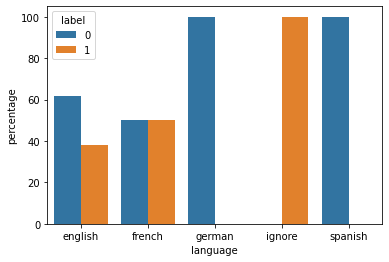

In [67]:
# vraag 3
enc = OrdinalEncoder(categories=[['Fake', 'Real']])
df[["label"]] = enc.fit_transform(df[["label"]])
df[["label"]] = df[["label"]].astype('int8')

print("percentages per taal; 0 = fake, 1 = real")
percentagepertaal = df.groupby(['language', 'label']).count().groupby('language').apply(lambda x: 100 * x / x.sum())
percentagepertaal.rename(columns={"hasImage": "percentage"}, inplace=True)
percentagepertaal.reset_index(inplace=True)
percentagepertaal = percentagepertaal[["language", "label", "percentage"]]
display(percentagepertaal)

print("aantal artikkels per taal")
artikelspertaal = df.groupby(['language', 'label'])[["hasImage"]].count()
artikelspertaal.rename(columns={"hasImage": "aantal"}, inplace=True)
artikelspertaal.reset_index(inplace=True)

display(artikelspertaal)

sns.barplot(data=percentagepertaal, x="language", y="percentage", hue="label")

# alleen de engelse selecteren voor volgende oefeningen
df = df.loc[df['language'] == "english"]

**Vraag 3:** Het percentage is niet vergelijkbaar met andere talen. De sample sizes komen ook gewoon niet overeen. Er zijn maar 2 franse artikelen (1 real, 1 fake), 72 duitse (allemaal fake), ignore en spaans zijn ook weg te laten omdat ze samen maar 4 artikkels hebben. 

,true_or_false,headline_length,headline_amount_of_words,text_length,text_amount_of_words
0,1,51,8,492,87
1,1,57,10,1720,277
2,1,67,9,1323,226
3,1,115,21,262,48
4,1,90,14,2047,332
...,...,...,...,...,...
2045,1,37,8,538,89
2046,1,31,4,975,181
2047,1,31,5,798,155
2048,1,48,8,3225,543


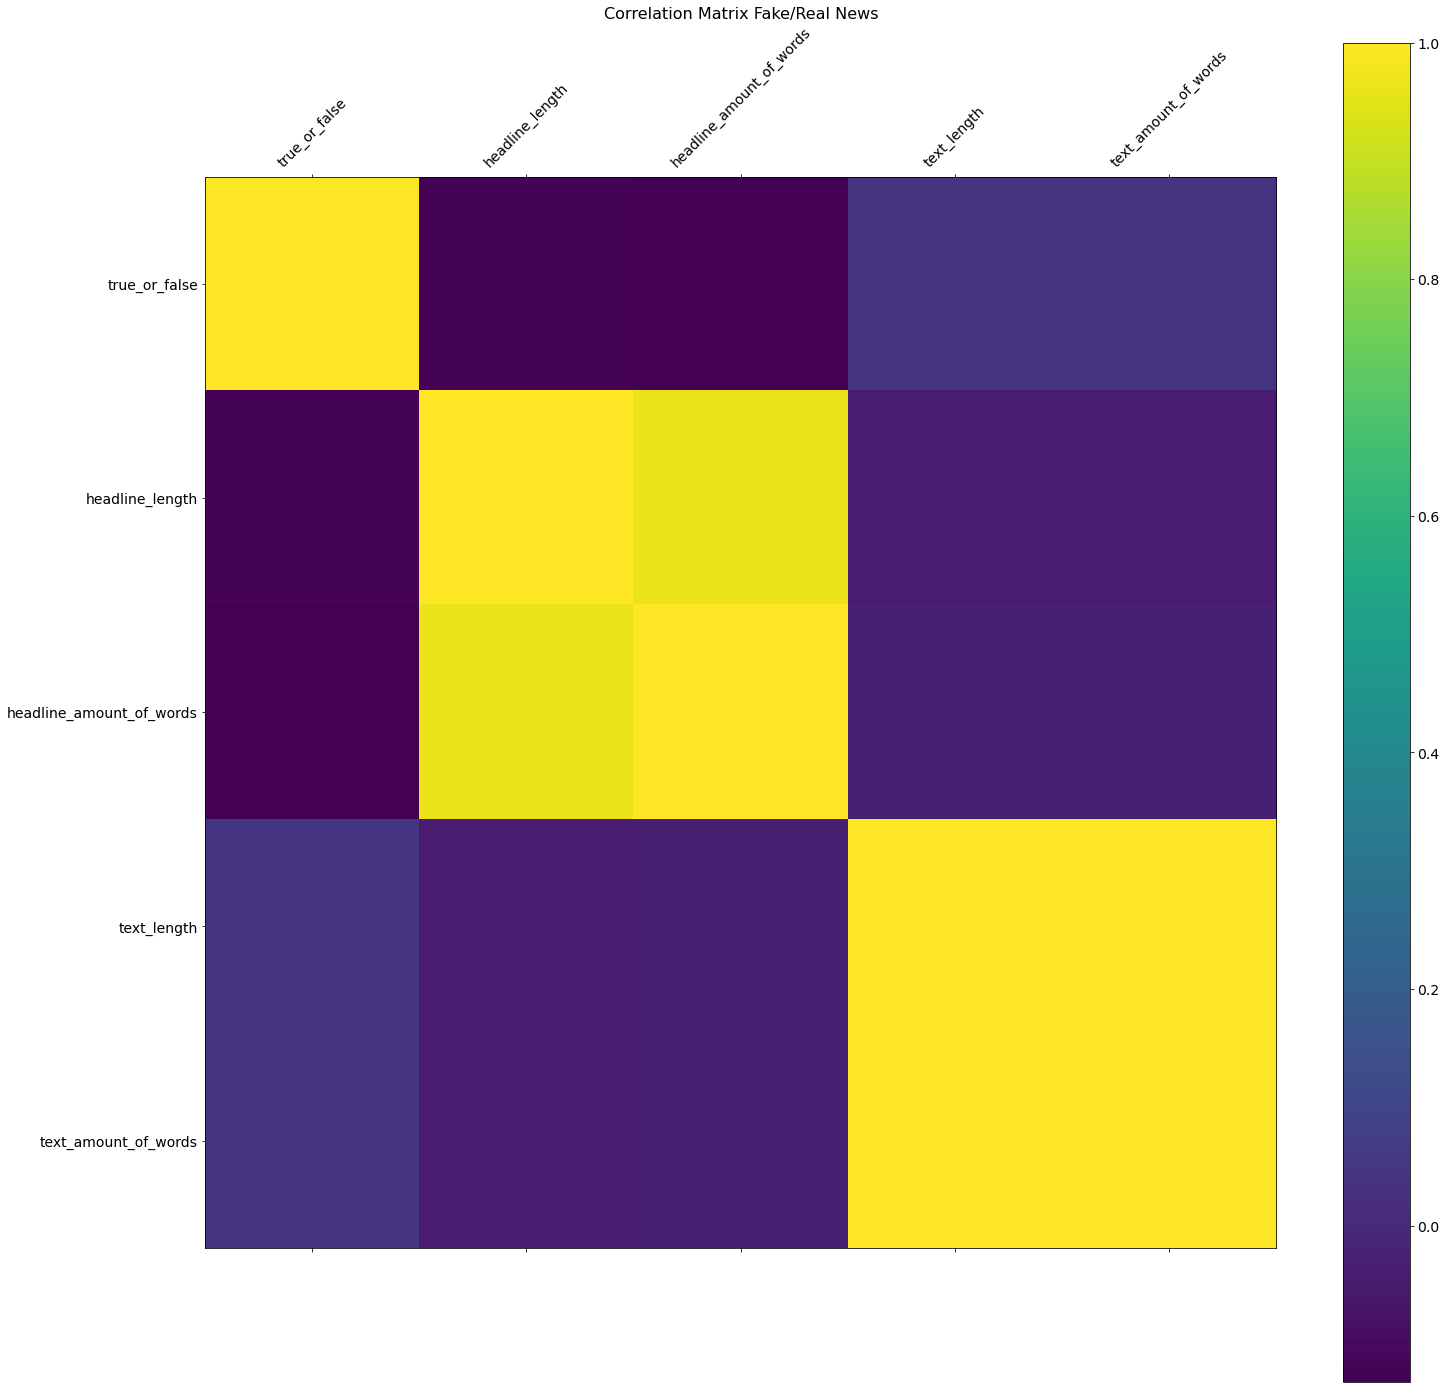

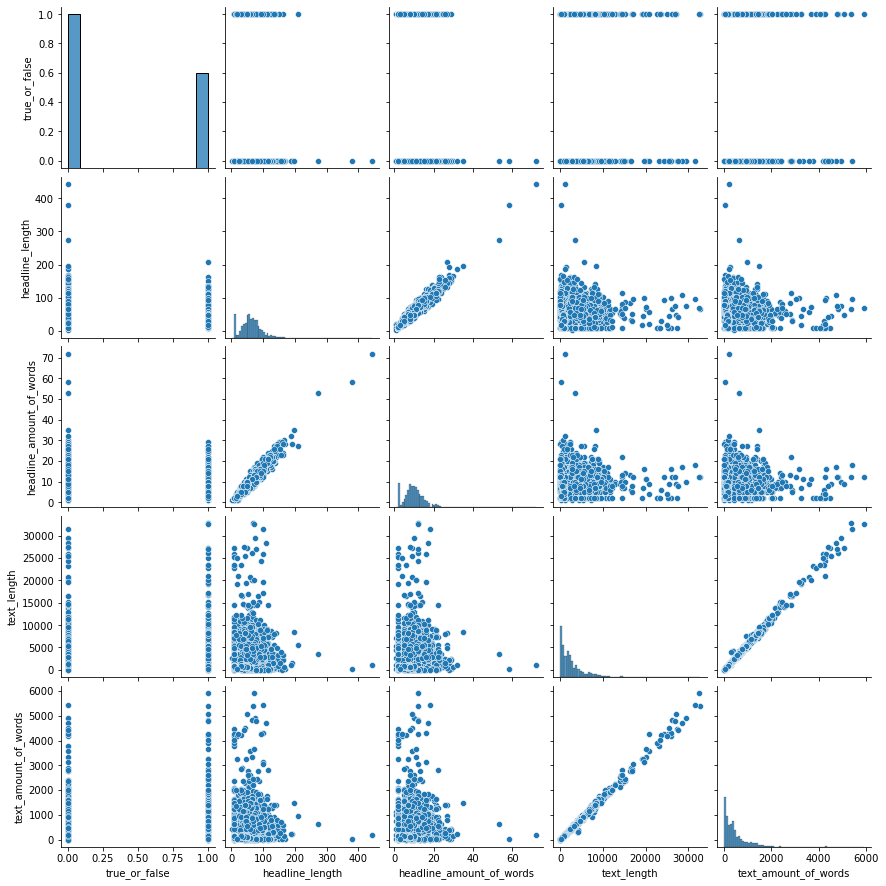

In [68]:
# Vraag 4
# Bereken de volgende numerieke features voor de artikels:
#   * de lengte van de headline 
#    * het aantal woorden van de headline
#    * de lengte van de tekst
#    * het aantal woorden in de tekst
dfvraag4 = pd.DataFrame()
dfvraag4["true_or_false"] = df["label"]
dfvraag4["headline_length"] = df["title"].str.len()
dfvraag4["headline_amount_of_words"] = df["title"].str.split(" ").str.len()
dfvraag4["text_length"] = df["text"].str.len()
dfvraag4["text_amount_of_words"] = df["text"].str.split(" ").str.len()
display(dfvraag4)


f = plt.figure(figsize=(24,24))
plt.matshow(dfvraag4.corr(), fignum=f.number)
plt.xticks(range(len(dfvraag4.columns)), dfvraag4.columns, rotation=45, fontsize=14)
plt.yticks(range(len(dfvraag4.columns)), dfvraag4.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation Matrix Fake/Real News", fontsize=16)

sns.pairplot(dfvraag4)

**Vraag 4:** Er is geen sterke correlatie tussen de true/false kolom en de andere. True/false heeft een kleine negatieve correlatie met de eigenschappen van de titel, en een kleine positiefe correlatie met de eigenschappen van de tekst. We zien duidelijk de lineraie verbanden tussen de lengte en de amount of words. Voor de rest zijn we niet veel met de deze data. Het is moeilijk om in te schatten of een van de gekende ML-technieken hier goed gaat mee kunnen werken omdat we eigenlijk niet met deze data werken maar met de echte content van de titels en text van de artikels.

Maak nu een dataframe df_features aan dat de volgende kolommen bevat:
* title with stop words
* text with stop words
* lenght of title
* number of words in title
* length of text
* number of words in text
* if the story has an image

Zorg daarnaast dat er een df_label dataframe is met de bijhorende labels

In [69]:
# df_features en df_label
print("df_features")
df_features = pd.DataFrame()
df_features["title"] = df["title"]
df_features["text"] = df["text"]
df_features["title_length"] = df["title"].str.len()
df_features['title_amount_of_words'] = df['title'].str.split(" ").str.len()
df_features["text_length"] = df["text"].str.len()
df_features['text_amount_of_words'] = df['text'].str.split(" ").str.len()
df_features['has_image'] = df['hasImage'].astype('int8')
display(df_features)

print("df_label")
df_label = df[["label"]]
display(df_label)


df_features


,title,text,title_length,title_amount_of_words,text_length,text_amount_of_words,has_image
0,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,51,8,492,87,1
1,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,57,10,1720,277,1
2,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,67,9,1323,226,1
3,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,115,21,262,48,1
4,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,90,14,2047,332,1
...,...,...,...,...,...,...,...
2045,trump vs clinton a risk vs a disaster,check out hillarythemed haunted house anticlin...,37,8,538,89,0
2046,gingrich slutshames megyn kelly,good samaritan wearing indian headdress disarm...,31,4,975,181,1
2047,youtube bans clintons black son,skype sex scam a fortune built on shame moroc...,31,5,798,155,1
2048,wikileaks bombshells on hillary you need to know,posted by eddie while the skyhigh potency may ...,48,8,3225,543,1


df_label


,label
0,1
1,1
2,1
3,1
4,1
...,...
2045,1
2046,1
2047,1
2048,1


### Tekst omzetten naar feature vector

Maak een pipeline dat de nodige preprocessing stappen uitvoert van het dataframe samengesteld in de vorige stap. Let hierbij op de volgende zaken:
* Zet de title kolom om naar een vector van matrix van tf-idf features.
* Zorg ervoor dat stopwoorden verwijderd worden, alles lowercase is en accenten genegeerd worden
* Zorg ervoor dat woorden die in meer dan 80% van de documenten voorkomen niet meegeteld worden
* Let op een correct verwerking van de numerieke kolommen (moet de hasImage kolom op dezelfde manier behandeld worden?)

In [70]:
# Woorden zoeken die in meer dan 80% van de documenten voorkomen:

# Titels:
count_vectorizer = CountVectorizer()
bag_of_words_titel = count_vectorizer.fit_transform(df_features["title"])
bag_of_words_titel = pd.DataFrame(bag_of_words_titel.toarray(), columns = count_vectorizer.get_feature_names_out())
bag_of_words_titel = bag_of_words_titel.T
bag_of_words_titel["aantal_documenten_waar_woord_in_voorkomt"] = bag_of_words_titel[bag_of_words_titel > 0].count(axis=1)
bag_of_words_titel["totaal_aantal_documenten"] = df_features["title"].count()
bag_of_words_titel["percentage_voorkomt"] = bag_of_words_titel["aantal_documenten_waar_woord_in_voorkomt"] / bag_of_words_titel["totaal_aantal_documenten"] * 100
selectie = bag_of_words_titel[["aantal_documenten_waar_woord_in_voorkomt", "totaal_aantal_documenten", "percentage_voorkomt"]]
display(selectie[selectie["percentage_voorkomt"] > 80])
print("Geen woorden gevonden die in meer dan 80% van de titels voorkomen")

,aantal_documenten_waar_woord_in_voorkomt,totaal_aantal_documenten,percentage_voorkomt


Geen woorden gevonden die in meer dan 80% van de titels voorkomen


In [71]:
# Woorden zoeken die in meer dan 80% van de documenten voorkomen:

# Text:
count_vectorizer = CountVectorizer()
bag_of_words_text = count_vectorizer.fit_transform(df_features["text"])
bag_of_words_text = pd.DataFrame(bag_of_words_text.toarray(), columns = count_vectorizer.get_feature_names_out())
bag_of_words_text = bag_of_words_text.T
bag_of_words_text["aantal_documenten_waar_woord_in_voorkomt"] = bag_of_words_text[bag_of_words_text > 0].count(axis=1)
bag_of_words_text["totaal_aantal_documenten"] = df_features["text"].count()
bag_of_words_text["percentage_voorkomt"] = bag_of_words_text["aantal_documenten_waar_woord_in_voorkomt"] / bag_of_words_text["totaal_aantal_documenten"] * 100
selectie = bag_of_words_text[["aantal_documenten_waar_woord_in_voorkomt", "totaal_aantal_documenten", "percentage_voorkomt"]]
selectie = selectie.reset_index()
selectie = selectie.rename(columns={"index": "woord"}) 
display(selectie[selectie["percentage_voorkomt"] > 80])
print("Woorden gevonden die in meer dan 80% van de texten voorkomen: and, in, of, the, to")

,woord,aantal_documenten_waar_woord_in_voorkomt,totaal_aantal_documenten,percentage_voorkomt
1516,and,1732,1971,87.874176
18641,in,1678,1971,85.134450
26347,of,1732,1971,87.874176
38016,the,1844,1971,93.556570
38528,to,1755,1971,89.041096


Woorden gevonden die in meer dan 80% van de texten voorkomen: and, in, of, the, to


In [72]:
# maak pipeline voor numerieke kolommen en title kolom

# remove non-letters
df_features["title"] = df_features["title"].apply(lambda text: re.sub("[^a-zA-Z]", " ", str(text)))

# to lower-case
df_features["title"] = df_features["title"].apply(lambda text: text.lower())

# remove stopwords
stop = stopwords.words('english')
df_features["title"] = df_features["title"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# remove woorden die meer dan in 80% van de titels voorkomen:
# geen woorden gevonden dus niks te doen

# remove accenten
df_features["title"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# values opnieuw berekenen
df_features["title_length"] = df_features["title"].str.len()
df_features['title_amount_of_words'] = df_features['title'].str.split(" ").str.len()
df_features["text_length"] = df_features["text"].str.len()
df_features['text_amount_of_words'] = df_features['text'].str.split(" ").str.len()
df_features['has_image'] = df_features['has_image'].astype('int8')
display(df_features)

title_features = ["title"]

numeric_features = ["title_length", "title_amount_of_words", "text_length", "text_amount_of_words"]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler())
])

title_transformer = Pipeline(steps=[
    ('count', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

preprocessor1 = ColumnTransformer(transformers=[
    ("title", title_transformer, title_features[0]),
    ("num", numeric_transformer, numeric_features)
])

,title,text,title_length,title_amount_of_words,text_length,text_amount_of_words,has_image
0,muslims busted stole millions govt benefits,print they should pay all the back all the mon...,43,6,492,87,1
1,attorney general loretta lynch plead fifth,why did attorney general loretta lynch plead t...,42,6,1720,277,1
2,breaking weiner cooperating fbi hillary email ...,red state \nfox news sunday reported this mor...,59,7,1323,226,1
3,pin drop speech father daughter kidnapped kill...,email kayla mueller was a prisoner and torture...,90,13,262,48,1
4,fantastic trumps point plan reform healthcare ...,email healthcare reform to make america great ...,78,9,2047,332,1
...,...,...,...,...,...,...,...
2045,trump vs clinton risk vs disaster,check out hillarythemed haunted house anticlin...,33,6,538,89,0
2046,gingrich slutshames megyn kelly,good samaritan wearing indian headdress disarm...,31,4,975,181,1
2047,youtube bans clintons black son,skype sex scam a fortune built on shame moroc...,31,5,798,155,1
2048,wikileaks bombshells hillary need know,posted by eddie while the skyhigh potency may ...,38,5,3225,543,1



Is er met bovenstaande aanpak een probleem op het vlak van data leakage? Waarop moet je letten om dit te vermijden. Verklaar je antwoorden!

**Antwoord:** Ja. We maken gebruik van title_length, title_amount_of_words etc. Dit is niet uit het originele dataframe, we maken die zelf. Deze zijn echter niet meer up to date omdat we bewerkingen hebben toegepast op de title kolom. De berekeningen moeten dus opnieuw worden uitgevoerd.

Maak nu een tweede pipeline aan die dezelfde zaken doet als de vorige maar ook de tf-idf vector berekend voor de tekst van het artikel.

Doe als test eens een test_transform van het volledige df_features dataframe.
Hoeveel features zijn er aanwezig na de preprocessing stap? Wat verklaart het verschil met het aantal kolommen in df_features?

In [73]:
# pipeline voor text en title
df_features2 = df_features

# remove non-letters
df_features2["text"] = df_features2["text"].apply(lambda text: re.sub("[^a-zA-Z]", " ", str(text)))

# to lower-case
df_features2["text"] = df_features2["text"].apply(lambda text: text.lower())

# remove stopwords
stop = stopwords.words('english')
df_features2["text"] = df_features2["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# remove woorden die meer dan in 80% van de titels voorkomen:
listwoorden = ["and", "in", "of", "the", "to"]
df_features2["text"] = df_features2["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (listwoorden)]))

# remove accenten
df_features2["text"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

df_features2 = df_features2[["title", "text"]]

# values opnieuw berekenen
display(df_features2)

title_feature = ["title"]
text_feature = ["text"]

title_transformer = Pipeline(steps=[
    ('count', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])


text_transformer = Pipeline(steps=[
    ('count', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

preprocessor2 = ColumnTransformer(transformers=[
    ("title", title_transformer, title_features[0]),
    ("text", text_transformer, text_feature[0]),
])

,title,text
0,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...
1,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...
2,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...
3,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...
4,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...
...,...,...
2045,trump vs clinton risk vs disaster,check hillarythemed haunted house anticlinton ...
2046,gingrich slutshames megyn kelly,good samaritan wearing indian headdress disarm...
2047,youtube bans clintons black son,skype sex scam fortune built shame moroccan bo...
2048,wikileaks bombshells hillary need know,posted eddie skyhigh potency may scare away cr...


### Trainen/testen/evalueren classifiers

Train drie verschillende classifiers op de data geproduceerd door de beide preprocessing pipelines aangemaakt in het vorige deel. 
Gebruik hiervoor de volgende technieken:
* Logistic regression
* K-Nearest Neighbour
* Naive Bayes

Let hierbij op alle belangrijke zaken om correct een model op te bouwen.

Ga op zoek naar de beste combinatie van hyperparameters door middel van een grid search.
Doe dit voor beide pipelines opgesteld in de vorige stap.
Indien je modellen krijgt die overfitten, voeg regularisatie toe aan de gridsearch parameters om dit te corrigeren.

Beantwoord nu de volgende vragen:
* Wat is het beste behaalde resultaat? Welke classificatie techniek behaalde dit resultaat en met welke hyperparameters? Op basis van welke metrieken heb je je antwoord gebaseerd?
* Was er een groot verschil tussen de resultaten met of zonder de tf-idf vector van de tekst van het artikel.
* Was er een groot verschil in de benodigde trainingstijd van de verschillende technieken?

**Antwoorden:**
* Logistic Regression 1: 0.685099846390169
* Logistic Regression 2: 0.7711213517665131
* KNN 1: 0.6712749615975423
* KNN 2: 0.6881720430107527
* NB 1: 0.6251920122887865
* NB 2: 0.7496159754224271
De beste score heb ik behaald met logistic regression met text en title.
De ingestelde hyperparameters zijn: C = 9.0 en solver =  "saga".
Er waren altijd verschillen tussen met of zonder de tf-idf vector maar het hangt af per techniek hoe groot d eze verschillen zijn. Meestal rond de 10%.
De tijden hadden een groot verschil omdat er veel meer data moet worden verwerkt bij de title en tekst.

In [74]:
# voor preprocesor 1 (title, numerieke kolommen)
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_features, df_label, test_size=0.33)

# voor preprocesor 2 (title en text)
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_features2, df_label, test_size=0.33)

In [75]:
# train logistic regression with first preprocessing pipeline (only title)

classifier = Pipeline([
    ("preprocessor", preprocessor1),
    ("lor", LogisticRegression(max_iter = 2147483647))])

parameters = [
    {"lor__C" :  np.concatenate(([0.01, 0.1], np.arange(1,10))), "lor__solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]},
]   

grid = GridSearchCV(classifier, parameters)
%time grid.fit(X_train1, np.ravel(y_train1))

print(grid.score(X_test1, y_test1))

print(grid.best_params_)

CPU times: total: 23.8 s
Wall time: 24 s
0.685099846390169
{'lor__C': 5.0, 'lor__solver': 'saga'}


In [76]:
# train logistic regression with second preprocessing pipeline (title and text)

classifier = Pipeline([
    ("preprocessor", preprocessor2),
    ("lor", LogisticRegression(max_iter = 2147483647))])

parameters = [
    {"lor__C" :  np.concatenate(([0.01, 0.1], np.arange(1,10))), "lor__solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]},
]   

grid = GridSearchCV(classifier, parameters)
%time grid.fit(X_train2, np.ravel(y_train2))

print(grid.score(X_test2, y_test2))

print(grid.best_params_)

CPU times: total: 7min 47s
Wall time: 2min 14s
0.7711213517665131
{'lor__C': 9.0, 'lor__solver': 'saga'}


In [77]:
# train KNN-classifier with first preprocessing pipeline (only title)

classifier = Pipeline([
    ("preprocessor", preprocessor1),
    ("knn", KNeighborsClassifier())])

parameters = [
    {"knn__n_neighbors" : np.arange(1,10), "knn__leaf_size" : np.arange(1,15), "knn__p" : [1,2]},
]   

grid = GridSearchCV(classifier, parameters)
%time grid.fit(X_train1, np.ravel(y_train1))

print(grid.score(X_test1, y_test1))

print(grid.best_params_)

CPU times: total: 7min 10s
Wall time: 51.2 s
0.6712749615975423
{'knn__leaf_size': 1, 'knn__n_neighbors': 2, 'knn__p': 1}


In [78]:
# train KNN-classifier with second preprocessing pipeline (title and text)

classifier = Pipeline([
    ("preprocessor", preprocessor2),
    ("knn", KNeighborsClassifier())])

parameters = [
    {"knn__n_neighbors" : np.arange(1,10), "knn__leaf_size" : np.arange(1,15), "knn__p" : [1,2]},
]   

grid = GridSearchCV(classifier, parameters)
%time grid.fit(X_train2, np.ravel(y_train2))

print(grid.score(X_test2, y_test2))

print(grid.best_params_)

CPU times: total: 26min 44s
Wall time: 7min 14s
0.6881720430107527
{'knn__leaf_size': 1, 'knn__n_neighbors': 8, 'knn__p': 2}


In [79]:
# train Naive Bayes classifier with first preprocessing pipeline (only title)
preprocessor1sparse = ColumnTransformer(transformers=[
    ("title", title_transformer, title_features[0]),
    ("num", numeric_transformer, numeric_features)
], sparse_threshold=0)

classifier = Pipeline([
    ("preprocessor", preprocessor1sparse),
    ("gnb", GaussianNB())
])

parameters = [
    {"gnb__var_smoothing": np.logspace(0,-9, num=100)},
]   

grid = GridSearchCV(classifier, parameters)
%time grid.fit(X_train1, np.ravel(y_train1))

print(grid.score(X_test1, y_test1))

print(grid.best_params_)

CPU times: total: 43.4 s
Wall time: 43.5 s
0.6251920122887865
{'gnb__var_smoothing': 0.03511191734215131}


In [80]:
# train Naive Bayes classifier with second preprocessing pipeline (title and text)
classifier = Pipeline([
    ("preprocessor", preprocessor2),
    ("mnb", MultinomialNB())
])

parameters = [
    {"mnb__alpha" :  [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]},
]   
grid = GridSearchCV(classifier, parameters)
%time grid.fit(X_train2, np.ravel(y_train2))

print(grid.score(X_test2, y_test2))

print(grid.best_params_)

CPU times: total: 8.77 s
Wall time: 8.78 s
0.7496159754224271
{'mnb__alpha': 0.1}
